## Body Fat Prediction

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

A.Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

import warnings

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Load the dataset
data = pd.read_csv("/content/bodyfat.csv")

# 1. Summarize the Data
# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB
None


In [14]:
categorical_attributes_func = data.select_dtypes(include='object')
continuous_attributes_func = data.select_dtypes(include=np.number)

In [15]:
categorical_attributes_func


""
0
1
2
3
4
...
247
248
249
250


In [16]:
continuous_attributes_func

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [17]:
continuous_attributes = ['Density',	'BodyFat',	'Age',	'Weight',	'Height',	'Neck',	'Chest',	'Abdomen',	'Hip',	'Thigh',	'Knee',	'Ankle',	'Biceps',	'Forearm',	'Wrist']

OBSERVATIONS:

Total entries = 252

Total features = 15

There are no categorial attrbutes in the dataset

All attributes has continuous values.

B.Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [9]:
continuous_attributes_func.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


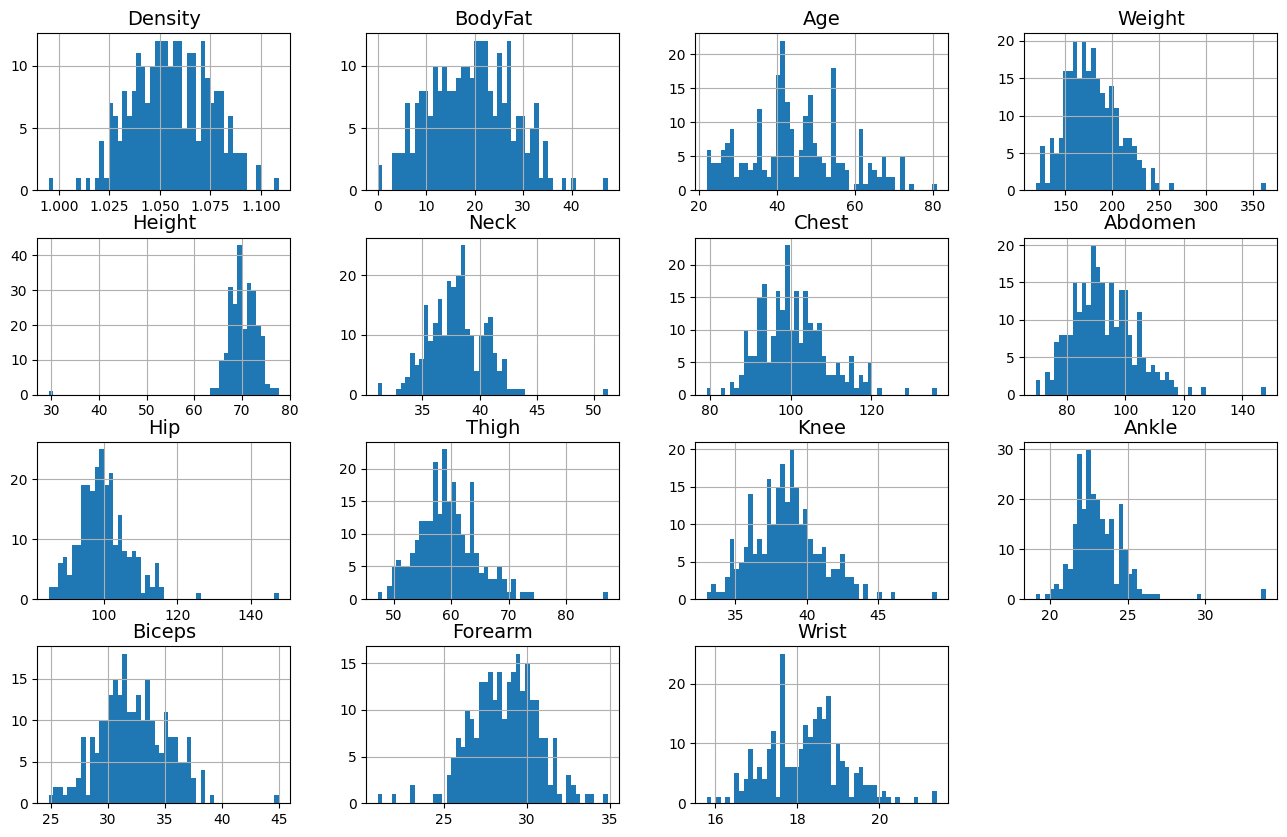

In [9]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(16, 10))

plt.show()

we observed that attribute Height is left skewed.

we will see any null values and replace them with median of the each feature
we will consider BodyFat as Label and remove it from the data.

C. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

          Density   BodyFat       Age    Weight    Height      Neck     Chest  \
Density  1.000000 -0.987782 -0.277637 -0.594062  0.097881 -0.472966 -0.682599   
BodyFat -0.987782  1.000000  0.291458  0.612414 -0.089495  0.490592  0.702620   
Age     -0.277637  0.291458  1.000000 -0.012746 -0.171645  0.113505  0.176450   
Weight  -0.594062  0.612414 -0.012746  1.000000  0.308279  0.830716  0.894191   
Height   0.097881 -0.089495 -0.171645  0.308279  1.000000  0.253710  0.134892   
Neck    -0.472966  0.490592  0.113505  0.830716  0.253710  1.000000  0.784835   
Chest   -0.682599  0.702620  0.176450  0.894191  0.134892  0.784835  1.000000   
Abdomen -0.798955  0.813432  0.230409  0.887995  0.087813  0.754077  0.915828   
Hip     -0.609331  0.625201 -0.050332  0.940884  0.170394  0.734958  0.829420   
Thigh   -0.553091  0.559608 -0.200096  0.868694  0.148436  0.695697  0.729859   
Knee    -0.495040  0.508665  0.017516  0.853167  0.286053  0.672405  0.719496   
Ankle   -0.264890  0.265970 

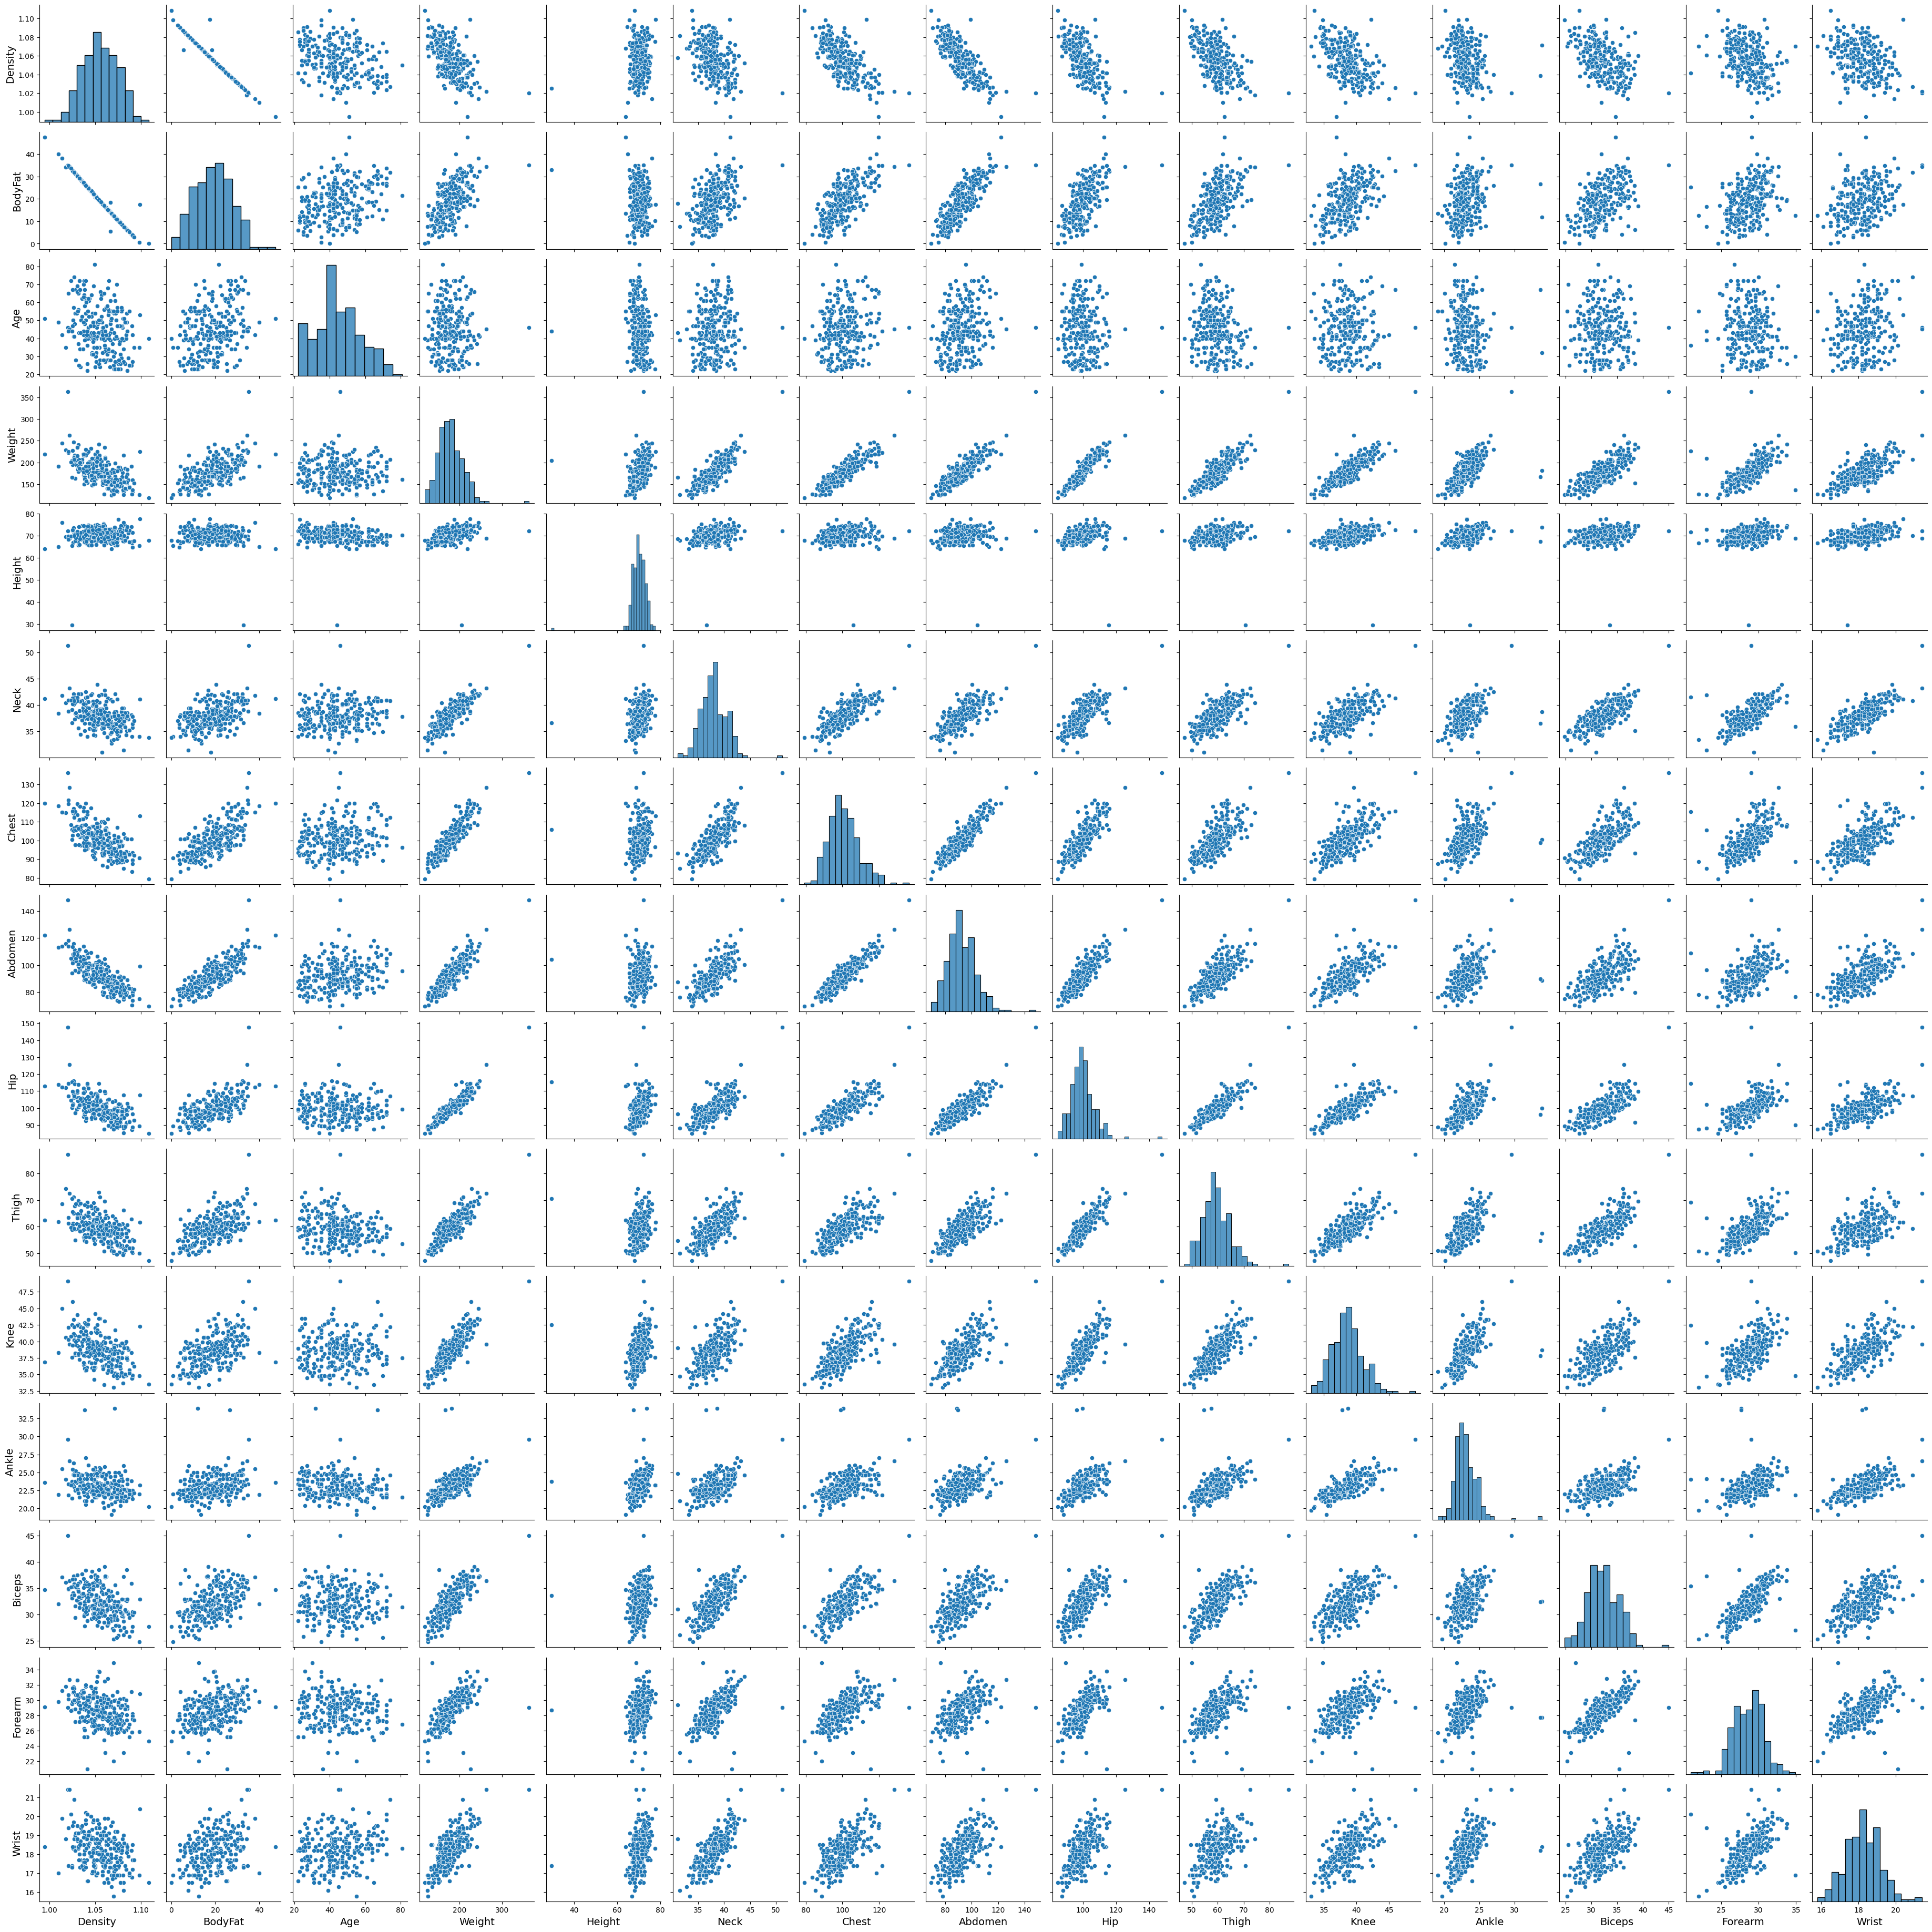

In [18]:
# 3. Analyze Relationships
# Calculate Pearson Correlation Coefficient (PCC)
correlation_matrix = data[continuous_attributes].corr()
print(correlation_matrix)

# Generate scatter plots for key attribute pairs
sns.pairplot(data[continuous_attributes])
plt.show()


BodyFat    1.000000
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612414
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height    -0.089495
Density   -0.987782
Name: BodyFat, dtype: float64


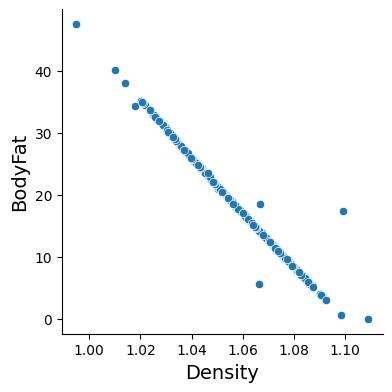

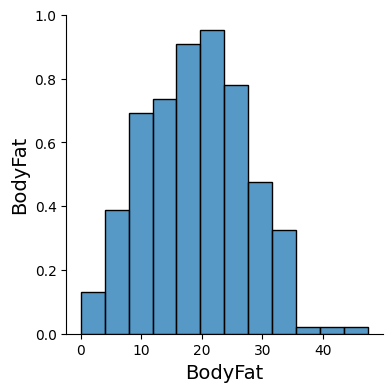

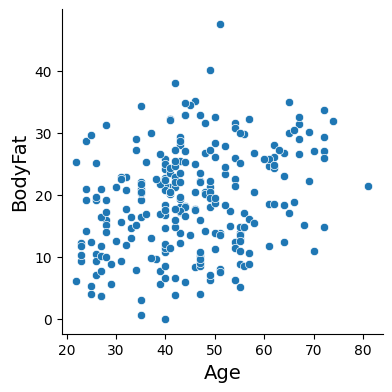

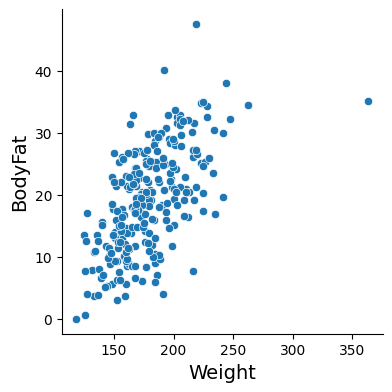

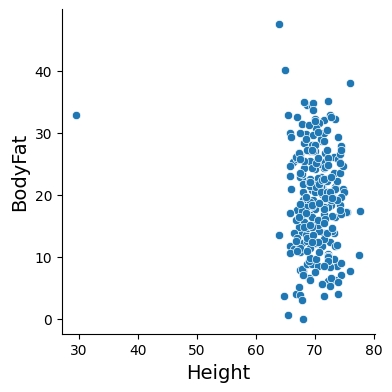

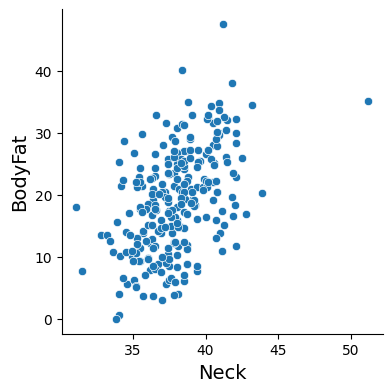

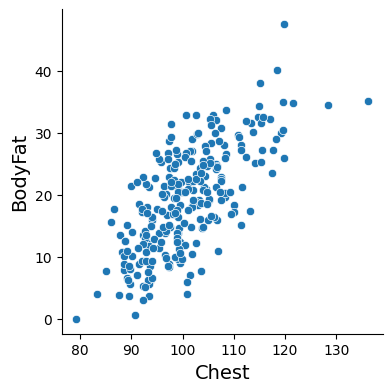

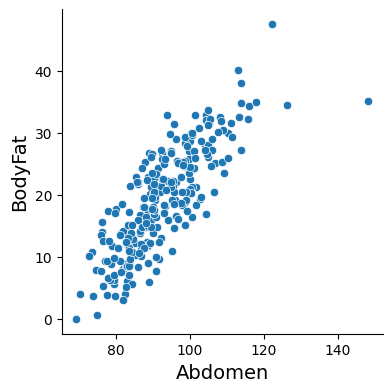

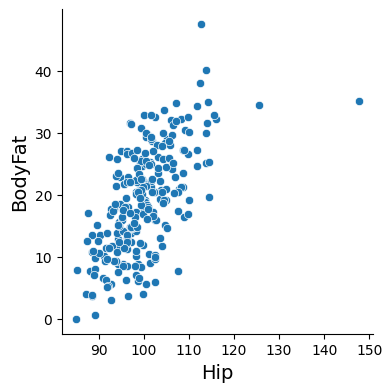

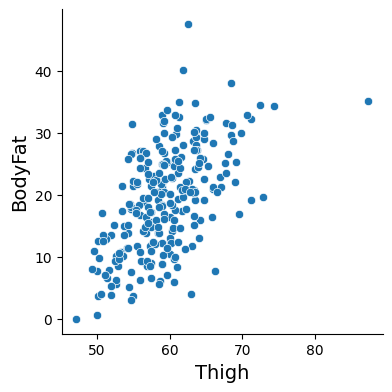

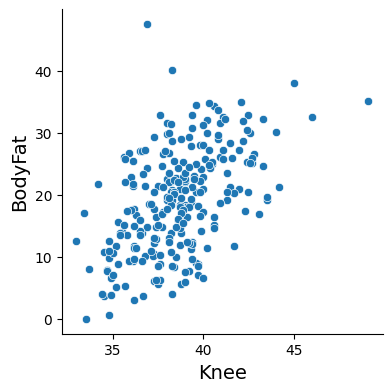

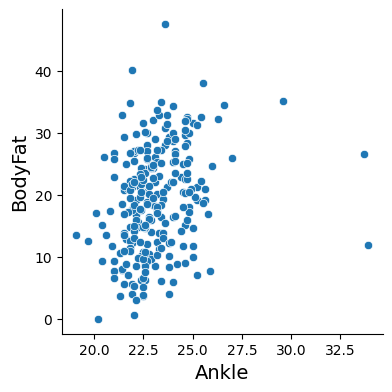

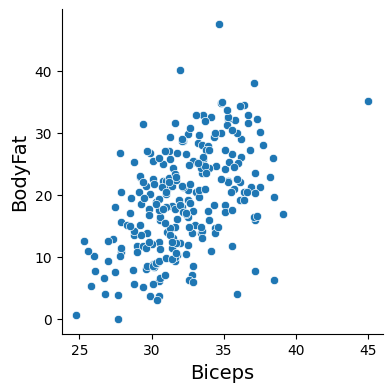

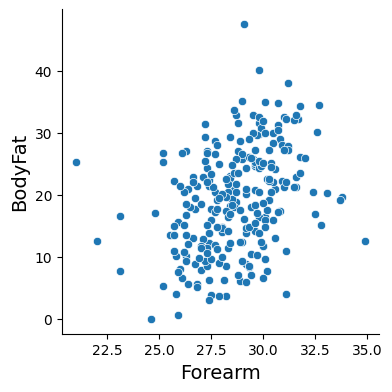

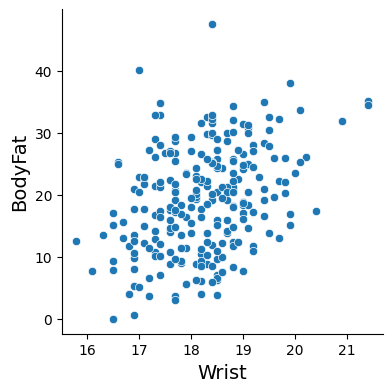

In [19]:
# between the Label and the each attribute
correlations_matrix_2 = (data).corr()
print(correlations_matrix_2["BodyFat"].sort_values(ascending=False))


for attr in data[continuous_attributes]:
  sns.pairplot(data=data, x_vars=[attr], y_vars=["BodyFat"], kind="scatter", height=4)
  plt.show()



*   From the correlation table between the label and the attributes , we have observed that Abdomen,Chest,Hip,Weight and density are strongly correlated with each other.
*   We can remove Height attribute as the correlation coefficient is very weak with label.



In [20]:

# drop weak correlated colums and label
data_num_updated=data[continuous_attributes]
data_num_updated.drop(columns=["BodyFat","Height"],axis=1, inplace =True)

In [21]:
data_num_updated.head()

,Density,Age,Weight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,154.25,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,154.00,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,184.75,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,184.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Dropping BodyFat as we consider it as label

In [22]:
#dropping rows which have null value in the label
data =data.dropna(subset=['BodyFat'])

Preprocessing the dataset

Replacing null values with median values

In [23]:
# Identify continuous and categorical attributes
continuous_attributes = ['Density',	'Age',	'Weight',	'Neck',	'Chest',	'Abdomen',	'Hip',	'Thigh',	'Knee',	'Ankle',	'Biceps',	'Forearm',	'Wrist']

num_con_pipeline= make_pipeline(StandardScaler(),SimpleImputer(strategy='median'))

In [26]:
prep= ColumnTransformer([("cont",num_con_pipeline,continuous_attributes)])


In [27]:
attri_prep= prep.fit_transform(data)

In [28]:
attributes= pd.DataFrame(attri_prep,columns=prep.get_feature_names_out(),index=data.index)

In [29]:
y= pd.DataFrame(data['BodyFat'])

In [30]:
attributes.describe()


,cont__Density,cont__Age,cont__Weight,cont__Neck,cont__Chest,cont__Abdomen,cont__Hip,cont__Thigh,cont__Knee,cont__Ankle,cont__Biceps,cont__Forearm,cont__Wrist
count,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02
mean,5.688571e-15,2.220446e-16,2.819614e-16,-8.247371e-16,-5.639228e-17,3.313046e-16,8.379540e-16,-8.582200e-16,8.758426e-16,7.542468e-16,-5.991680e-17,-3.002889e-15,3.348292e-16
std,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00
min,-3.189163e+00,-1.819583e+00,-2.060102e+00,-2.840817e+00,-2.558224e+00,-2.151708e+00,-2.084632e+00,-2.329591e+00,-2.322577e+00,-2.366135e+00,-2.478519e+00,-3.800254e+00,-2.607794e+00
25%,-7.462399e-01,-7.263189e-01,-6.793000e-01,-6.562274e-01,-7.694810e-01,-7.416097e-01,-6.160653e-01,-6.500498e-01,-6.711535e-01,-6.517075e-01,-6.876368e-01,-6.763048e-01,-6.759055e-01
50%,-3.547554e-02,-1.498703e-01,-8.265733e-02,3.271323e-03,-1.395583e-01,-1.492291e-01,-8.458411e-02,-7.747885e-02,-3.758855e-02,-1.787621e-01,-7.409368e-02,1.790624e-02,7.538454e-02
75%,7.805873e-01,7.247413e-01,6.162669e-01,5.906373e-01,5.408770e-01,6.289966e-01,5.063391e-01,5.618921e-01,5.544311e-01,5.306560e-01,6.803985e-01,6.625308e-01,6.120203e-01
max,2.807582e+00,2.871515e+00,6.280963e+00,5.444135e+00,4.204531e+00,5.161290e+00,6.684808e+00,5.323774e+00,4.366207e+00,6.383355e+00,4.220708e+00,3.092269e+00,3.402526e+00


In [31]:
y.describe()

,BodyFat
count,252.000000
mean,19.150794
std,8.368740
min,0.000000
25%,12.475000
50%,19.200000
75%,25.300000
max,47.500000


D.Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.


In [32]:
# 4. Data Splitting
# Split data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(attributes, y, test_size=0.2, random_state=42,shuffle=True)

In [33]:
# verification of  that our test portion of the data is representative of the entire dataset.

attributes.describe()

,cont__Density,cont__Age,cont__Weight,cont__Neck,cont__Chest,cont__Abdomen,cont__Hip,cont__Thigh,cont__Knee,cont__Ankle,cont__Biceps,cont__Forearm,cont__Wrist
count,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02
mean,5.688571e-15,2.220446e-16,2.819614e-16,-8.247371e-16,-5.639228e-17,3.313046e-16,8.379540e-16,-8.582200e-16,8.758426e-16,7.542468e-16,-5.991680e-17,-3.002889e-15,3.348292e-16
std,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00
min,-3.189163e+00,-1.819583e+00,-2.060102e+00,-2.840817e+00,-2.558224e+00,-2.151708e+00,-2.084632e+00,-2.329591e+00,-2.322577e+00,-2.366135e+00,-2.478519e+00,-3.800254e+00,-2.607794e+00
25%,-7.462399e-01,-7.263189e-01,-6.793000e-01,-6.562274e-01,-7.694810e-01,-7.416097e-01,-6.160653e-01,-6.500498e-01,-6.711535e-01,-6.517075e-01,-6.876368e-01,-6.763048e-01,-6.759055e-01
50%,-3.547554e-02,-1.498703e-01,-8.265733e-02,3.271323e-03,-1.395583e-01,-1.492291e-01,-8.458411e-02,-7.747885e-02,-3.758855e-02,-1.787621e-01,-7.409368e-02,1.790624e-02,7.538454e-02
75%,7.805873e-01,7.247413e-01,6.162669e-01,5.906373e-01,5.408770e-01,6.289966e-01,5.063391e-01,5.618921e-01,5.544311e-01,5.306560e-01,6.803985e-01,6.625308e-01,6.120203e-01
max,2.807582e+00,2.871515e+00,6.280963e+00,5.444135e+00,4.204531e+00,5.161290e+00,6.684808e+00,5.323774e+00,4.366207e+00,6.383355e+00,4.220708e+00,3.092269e+00,3.402526e+00


In [34]:
X_test.describe()

,cont__Density,cont__Age,cont__Weight,cont__Neck,cont__Chest,cont__Abdomen,cont__Hip,cont__Thigh,cont__Knee,cont__Ankle,cont__Biceps,cont__Forearm,cont__Wrist
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.121440,-0.215349,0.113817,0.050147,0.083816,-0.025606,0.062958,0.133587,0.045502,0.245498,0.255926,-0.034597,0.045922
std,0.817939,0.942349,1.173599,1.136381,0.972026,1.052099,1.170096,1.085461,1.036768,1.223944,1.060918,0.982885,1.070064
min,-1.862403,-1.740073,-1.199231,-1.563038,-1.369690,-1.510543,-1.497205,-1.737935,-1.574763,-0.947298,-2.146874,-2.758938,-1.749177
25%,-0.414550,-0.905217,-0.662253,-0.676837,-0.424806,-0.553442,-0.532147,-0.468736,-0.764630,-0.415235,-0.422321,-0.626718,-0.890560
50%,0.064558,-0.308891,-0.057087,-0.161603,-0.038533,-0.144583,-0.084584,-0.096565,0.045502,-0.119644,0.141476,-0.180440,-0.031943
75%,0.620007,0.446456,0.556603,0.477286,0.484422,0.352552,0.453890,0.781378,0.481727,0.589774,1.036917,0.712117,0.719347
max,1.870426,2.155924,6.280963,5.444135,4.204531,5.161290,6.684808,5.323774,4.366207,6.383355,4.220708,2.497231,3.402526


In [35]:
y_train.describe()

,BodyFat
count,201.000000
mean,19.435821
std,8.696517
min,0.000000
25%,12.400000
50%,19.600000
75%,25.800000
max,47.500000


If we look at the data given by test describe, min,standard deviation and the quartile range looks similiar. This means test portion of the data is the representative of the entire dataset.

E.Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.

In [36]:
linear=LinearRegression().fit(X_train,y_train)
linear_cv=cross_validate(linear,X_train,y_train,scoring=['neg_root_mean_squared_error'],cv=4,return_train_score=True)

In [37]:
print("training loss : {:,.3f}".format(-np.mean(linear_cv['train_neg_root_mean_squared_error'])))
print("validation loss : {:,.3f}".format(-np.mean(linear_cv['test_neg_root_mean_squared_error'])))

training loss : 1.298
validation loss : 1.408


SGD

In [38]:
sgd=SGDRegressor(max_iter=1000, tol=1e-5,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd.fit(X_train,y_train)
sgd_cv=cross_validate(sgd,X_train,y_train,scoring=['neg_root_mean_squared_error'],cv=4,return_train_score=True)

In [39]:
print("training loss : {:,.3f}".format(-np.mean(sgd_cv['train_neg_root_mean_squared_error'])))
print("Validation loss : {:,.3f}".format(-np.mean(sgd_cv['test_neg_root_mean_squared_error'])))

training loss : 1.299
Validation loss : 1.411


SGD, display the training and validation loss as a function of training iteration.

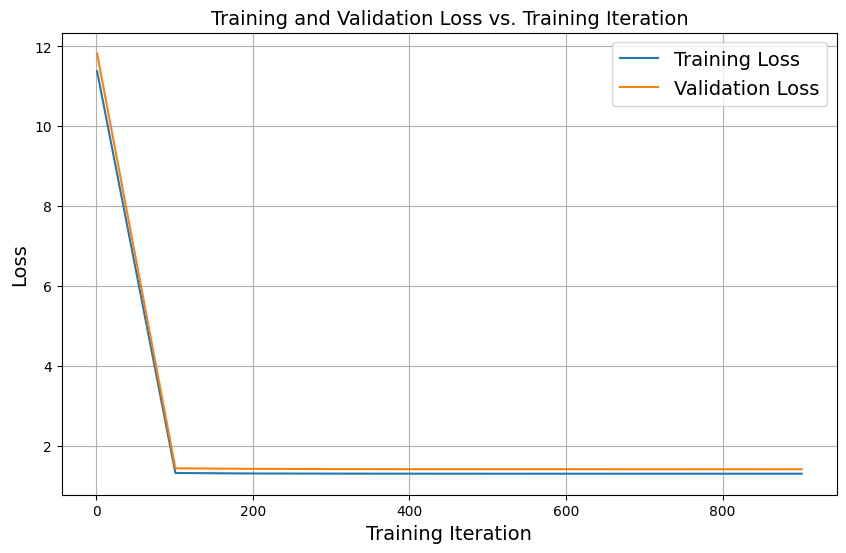

In [40]:
t_loss=[]
v_loss=[]
for i in range(1,1001,100):
  sgd1=SGDRegressor(max_iter=i, tol=1e-5,eta0=0.01,n_iter_no_change=100,random_state=42)
  sgd1.fit(X_train,y_train)
  sgd1_cv=cross_validate(sgd1,X_train,y_train,scoring=['neg_root_mean_squared_error'],cv=4,return_train_score=True)
  t_loss.append(-np.mean(sgd1_cv['train_neg_root_mean_squared_error']))
  v_loss.append(-np.mean(sgd1_cv['test_neg_root_mean_squared_error']))
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1000 + 1,100), t_loss, label='Training Loss')
plt.plot(range(1, 1000 + 1,100), v_loss, label='Validation Loss')
plt.xlabel('Training Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss vs. Training Iteration')
plt.grid(True)
plt.show()




Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact.

In [41]:
# Define a range of alpha (penalty term) values to explore
alphas = [0.01, 0.1, 1.0, 10.0]

# Initialize lists to store results
ridge_results = []
lasso_results = []
elastic_net_results = []

# Ridge Regression
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    rmse_mean = rmse_scores.mean()
    ridge_results.append({'Alpha': alpha, 'RMSE Mean': rmse_mean})

# Lasso Regression
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    scores = cross_val_score(lasso, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    rmse_mean = rmse_scores.mean()
    lasso_results.append({'Alpha': alpha, 'RMSE Mean': rmse_mean})

# Elastic Net
for alpha in alphas:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)
    scores = cross_val_score(elastic_net, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    rmse_mean = rmse_scores.mean()
    elastic_net_results.append({'Alpha': alpha, 'RMSE Mean': rmse_mean})

# Print the results for Ridge, Lasso, and Elastic Net
print("Ridge Regression Results:")
print(ridge_results)
print("Lasso Regression Results:")
print(lasso_results)
print("Elastic Net Results:")
print(elastic_net_results)


Ridge Regression Results:
[{'Alpha': 0.01, 'RMSE Mean': 1.4079079930954448}, {'Alpha': 0.1, 'RMSE Mean': 1.4090341648564462}, {'Alpha': 1.0, 'RMSE Mean': 1.4230817339735018}, {'Alpha': 10.0, 'RMSE Mean': 1.6383829473388694}]
Lasso Regression Results:
[{'Alpha': 0.01, 'RMSE Mean': 1.3837321400656646}, {'Alpha': 0.1, 'RMSE Mean': 1.376813643779178}, {'Alpha': 1.0, 'RMSE Mean': 1.7788714699232568}, {'Alpha': 10.0, 'RMSE Mean': 8.674780565174668}]
Elastic Net Results:
[{'Alpha': 0.01, 'RMSE Mean': 1.4048448530393032}, {'Alpha': 0.1, 'RMSE Mean': 1.542827475759133}, {'Alpha': 1.0, 'RMSE Mean': 3.092634206490011}, {'Alpha': 10.0, 'RMSE Mean': 7.802572198597138}]


Ridge Regression Results:

Ridge regression was tested with different values of alpha, which controls the regularization strength.
The RMSE (Root Mean Square Error) Mean values indicate the model's predictive performance.
For Ridge regression:
The lowest RMSE Mean is achieved with an alpha of 0.01, indicating that this regularization strength provides the best predictive performance.
As alpha increases, the RMSE Mean also increases, suggesting that stronger regularization (higher alpha values) leads to worse predictive performance.
Lasso Regression Results:

Lasso regression, like Ridge, was tested with different alpha values for regularization.
The RMSE Mean values are used to assess the model's predictive performance.
For Lasso regression:
The lowest RMSE Mean is obtained with an alpha of 0.1, indicating that this regularization strength results in the best predictive performance.
When alpha is 1.0, the RMSE Mean increases significantly, suggesting that stronger regularization (higher alpha) is detrimental to predictive accuracy.
An alpha of 10.0 results in an exceptionally high RMSE Mean, indicating poor model performance.
Elastic Net Results:

Elastic Net combines L1 (Lasso) and L2 (Ridge) regularization and was tested with different alpha values.
RMSE Mean values are used to evaluate predictive performance.
For Elastic Net regression:
The lowest RMSE Mean is found with an alpha of 0.01, indicating that this combination of L1 and L2 regularization provides the best predictive accuracy.
As alpha increases, the RMSE Mean also increases, suggesting that stronger regularization results in poorer predictive performance.

Summary:

Regularization techniques (Ridge, Lasso, Elastic Net) are applied to regression models to prevent overfitting by adding penalty terms to the model's loss function.
The choice of the regularization strength (alpha) significantly impacts the model's predictive performance.
In Ridge and Elastic Net, lower alpha values tend to yield better predictive accuracy, while higher alpha values result in increased RMSE Mean, indicating over-regularization.
In Lasso, an alpha of 0.1 provided the best predictive performance, but stronger regularization (alpha=1.0) led to significantly worse results.
It's essential to select an appropriate alpha value based on the specific dataset and problem at hand to strike a balance between bias and variance in the model.

Hypertunning with learning rate

In [42]:
learning_rates = [0.01, 0.1, 0.5]
#batch_sizes = [32, 64, 128]

# Initialize lists to store results
sgd_results = []

for lr_rate in learning_rates:
    #for batch_size_choosen in batch_sizes:
        sgd = SGDRegressor(learning_rate='constant', eta0=lr_rate, max_iter=100, tol=1e-3, random_state=42)
        scores = cross_val_score(sgd, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)
        rmse_mean = rmse_scores.mean()
        sgd_results.append({'Learning Rate': lr_rate,'RMSE Mean': rmse_mean})

# Print the results for SGDRegressor
print("SGDRegressor Results:")
print(sgd_results)

SGDRegressor Results:
[{'Learning Rate': 0.01, 'RMSE Mean': 1.4512721260780466}, {'Learning Rate': 0.1, 'RMSE Mean': 545.4705784391148}, {'Learning Rate': 0.5, 'RMSE Mean': 3026320421910.9756}]


Hypertuning with batch size and learning rate simultaneously

In [43]:
import warnings
warnings.filterwarnings("ignore")



from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Define hyperparameters
learning_rate = [0.01,0.1,1]
max_epochs = 15
batch_sizes = [32, 64, 100]  # Explore different batch sizes
for j in learning_rate:
  # Initialize the SGDRegressor
  regressor = SGDRegressor(learning_rate='constant', eta0=j, random_state=42)

  # Training loop
  for batch_size in batch_sizes:
      for epoch in range(max_epochs):
          for i in range(0, len(X_train), batch_size):
              # Get the current mini-batch
              X_batch = X_train[i:i + batch_size]
              y_batch = y_train[i:i + batch_size]

              # Update the model parameters using the mini-batch
              regressor.partial_fit(X_batch, y_batch)

          # Make predictions on the test set
          y_pred = regressor.predict(X_test)

          # Calculate Mean Squared Error on the test set
          mse = mean_squared_error(y_test, y_pred)

          # Print the batch size and test MSE for this epoch
          print(f'Learning_rate:{j},Batch Size: {batch_size}, Epoch: {epoch + 1}, Test MSE: {mse}')

Learning_rate:0.01,Batch Size: 32, Epoch: 1, Test MSE: 11.492494254299809
Learning_rate:0.01,Batch Size: 32, Epoch: 2, Test MSE: 2.1318717540560344
Learning_rate:0.01,Batch Size: 32, Epoch: 3, Test MSE: 1.1096866914335215
Learning_rate:0.01,Batch Size: 32, Epoch: 4, Test MSE: 0.7510434907539233
Learning_rate:0.01,Batch Size: 32, Epoch: 5, Test MSE: 0.5703049603389541
Learning_rate:0.01,Batch Size: 32, Epoch: 6, Test MSE: 0.4662029852413913
Learning_rate:0.01,Batch Size: 32, Epoch: 7, Test MSE: 0.4015038908597087
Learning_rate:0.01,Batch Size: 32, Epoch: 8, Test MSE: 0.35903283041305023
Learning_rate:0.01,Batch Size: 32, Epoch: 9, Test MSE: 0.3299528008289561
Learning_rate:0.01,Batch Size: 32, Epoch: 10, Test MSE: 0.30937819633258706
Learning_rate:0.01,Batch Size: 32, Epoch: 11, Test MSE: 0.29444636015661735
Learning_rate:0.01,Batch Size: 32, Epoch: 12, Test MSE: 0.28339427374263576
Learning_rate:0.01,Batch Size: 32, Epoch: 13, Test MSE: 0.2750889499232979
Learning_rate:0.01,Batch Size:

Learning Rate: 0.01

Lower learning rates, such as 0.01, tend to converge more gradually.
As the number of epochs increases, the test MSE decreases, indicating improved model performance.
For batch size 32, the test MSE reduces significantly from 11.49 in the first epoch to 0.26 in the 15th epoch, demonstrating steady convergence.
Batch size 64 also shows a similar decreasing trend in test MSE, from 0.25 to 0.23, indicating convergence.
Batch size 100 with a learning rate of 0.01 achieves test MSE reduction from 0.20 to 0.20, showing convergence but with a lower final MSE compared to smaller batch sizes.
Learning Rate: 0.1

A learning rate of 0.1 is relatively high.
The initial test MSE is extremely high (e.g., 1384.17 for batch size 32), indicating poor model performance.
However, for batch size 64, the test MSE decreases dramatically from 129994.27 to 8.91 in the later epochs, suggesting some improvement.
Batch size 100 also shows a reduction in test MSE but remains relatively high, indicating slower convergence.
Learning Rate: 1

A learning rate of 1 is very high and may lead to divergence.
In most cases, the test MSE starts at an extremely high value and increases substantially with each epoch, indicating that the model diverges.
This is especially evident in batch size 32, where the test MSE reaches extremely large values (e.g., 5.87e+25).
Summary:

Lower learning rates (e.g., 0.01) generally lead to better convergence and lower test MSE.
Smaller batch sizes (e.g., 32 or 64) tend to converge faster, but batch size 100 also converges with a slightly larger final MSE.
A learning rate of 0.1 can work with careful tuning and patience, but a learning rate of 1 is too high and leads to divergence.
The choice of learning rate and batch size can significantly impact the training process and model convergence. It's essential to strike a balance between a learning rate that is too slow (resulting in slow convergence) and one that is too high (leading to divergence).

F. Repeat the previous step with polynomial regression. Using validation loss, explore if your model overfits/underfits the data

Polynomial Regression with Normal form

In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)


In [45]:
poly=LinearRegression().fit(X_train_poly,y_train)
poly_cv=cross_validate(poly,X_train_poly,y_train,scoring=['neg_root_mean_squared_error'], cv=4 ,return_train_score=True)

In [46]:
print("training loss : {:,.3f}".format(-np.mean(poly_cv['train_neg_root_mean_squared_error'])))
print("validation loss : {:,.3f}".format(-np.mean(poly_cv['test_neg_root_mean_squared_error'])))

training loss : 0.474
validation loss : 2.894


In [47]:
for fold, val_loss in enumerate(poly_cv['test_neg_root_mean_squared_error']):
    print(f"Validation loss for Fold {fold + 1}: {-val_loss:.3f}")


Validation loss for Fold 1: 3.315
Validation loss for Fold 2: 4.352
Validation loss for Fold 3: 2.170
Validation loss for Fold 4: 1.737


Training Loss: The training loss of 0.474 indicates how well the model fits the training data. A low training loss suggests that the model fits the training data relatively well.

Validation Losses for Folds: The validation losses for each fold provide insights into how well the model generalizes to unseen data.

Fold 1: Validation loss of 3.315 is significantly higher than the training loss (0.474). This suggests that the model is struggling to generalize to Fold 1, indicating potential underfitting to the training data. The model is not performing well on Fold 1, which is a sign of underfitting.

Fold 2: Validation loss of 4.352 is considerably higher than the training loss (0.474). Similar to Fold 1, this indicates that the model is underfitting the training data and is unable to generalize to Fold 2.

Fold 3: Validation loss of 2.170 is lower than the training loss but still higher. This suggests that the model is showing some capacity to generalize to Fold 3, but there is room for improvement.

Fold 4: Validation loss of 1.737 is lower than both the training loss and the validation losses for Folds 1 and 2. This indicates that the model is performing relatively better on Fold 4, showing the potential for better generalization.

Overall Assessment:

The model appears to be underfitting the training data in Folds 1 and 2, as indicated by significantly higher validation losses compared to the training loss.

Folds 3 and 4, with relatively lower validation losses, suggest that the model has the potential to generalize better in certain cases.

Polynomial Regression with SGD

In [48]:
sgd_poly=SGDRegressor(max_iter=1000, tol=1e-5,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd_poly.fit(X_train_poly,y_train)
sgd_cv_poly=cross_validate(sgd_poly,X_train_poly,y_train,scoring=['neg_root_mean_squared_error'],cv=4,return_train_score=True)

In [49]:
print("training loss : {:,.3f}".format(-np.mean(sgd_cv_poly['train_neg_root_mean_squared_error'])))
print("Validation loss : {:,.3f}".format(-np.mean(sgd_cv_poly['test_neg_root_mean_squared_error'])))


training loss : 26,639.625
Validation loss : 59,595.259


In [50]:
for fold, val_loss in enumerate(sgd_cv_poly['test_neg_root_mean_squared_error']):
    print(f"Validation loss for Fold {fold + 1}: {-val_loss:.3f}")


Validation loss for Fold 1: 43049.709
Validation loss for Fold 2: 4.407
Validation loss for Fold 3: 57851.757
Validation loss for Fold 4: 137475.163


Training Loss: The training loss of 26,639.625 is a measure of how well the model fits the training data. This value represents the error between the model's predictions and the actual target values on the training dataset.

Validation Losses for Folds: The validation losses for each fold provide insights into how well the model generalizes to unseen data. Here's the analysis based on the validation losses:

Fold 1: Validation loss of 43,049.709 is higher than the training loss (26,639.625). This suggests that the model is struggling to generalize to Fold 1, indicating potential underfitting to the training data. The model is not performing well on Fold 1, which is a sign of underfitting.

Fold 2: Validation loss of 4.407 is lower than the training loss (26,639.625). it is overfitting.

Fold 3: Validation loss of 57,851.757 is higher than the training loss, indicating underfitting similar to Fold 1.

Fold 4: Validation loss of 137,475.163 is significantly higher than the training loss, indicating underfitting similar to Folds 1 and 3.

Overall Assessment:

The model appears to be underfitting the training data in all folds (Folds 1, 3, and 4) as indicated by higher validation losses compared to the training loss.

Fold 2, with a lower validation loss, suggests that the model is overfitting.

SGD, display the training and validation loss as a function of training iteration.

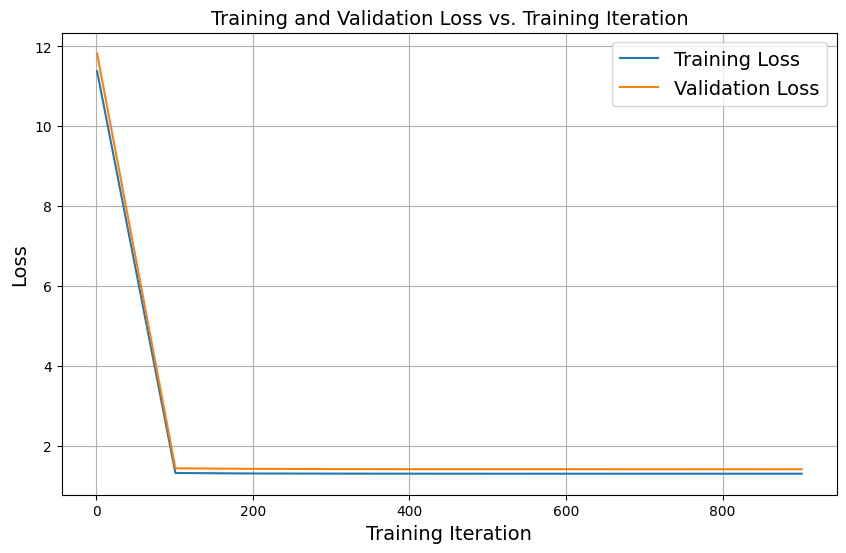

In [51]:
t_loss_poly=[]
v_loss_poly=[]
for i in range(1,1001,100):
  sgd_poly_1=SGDRegressor(max_iter=i, tol=1e-5,eta0=0.01,n_iter_no_change=100,random_state=42)
  sgd_poly_1.fit(X_train,y_train)
  sgd1_cv_poly=cross_validate(sgd_poly_1,X_train,y_train,scoring=['neg_root_mean_squared_error'],cv=4,return_train_score=True)
  t_loss_poly.append(-np.mean(sgd1_cv_poly['train_neg_root_mean_squared_error']))
  v_loss_poly.append(-np.mean(sgd1_cv_poly['test_neg_root_mean_squared_error']))
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1000 + 1,100), t_loss_poly, label='Training Loss')
plt.plot(range(1, 1000 + 1,100), v_loss_poly, label='Validation Loss')
plt.xlabel('Training Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss vs. Training Iteration')
plt.grid(True)
plt.show()

In [52]:
# Define a range of alpha (penalty term) values to explore
alphas = [0.01, 0.1, 1.0, 10.0]

# Initialize lists to store results
ridge_results_poly = []
lasso_results_poly = []
elastic_net_results_poly = []
# Ridge Regression
for alpha in alphas:
    ridge_poly = Ridge(alpha=alpha)
    ridge_poly.fit(X_train_poly,y_train)
    scores = cross_val_score(ridge_poly, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores_poly = np.sqrt(-scores)
    rmse_mean_poly = rmse_scores_poly.mean()
    ridge_results_poly.append({'Alpha': alpha, 'RMSE Mean': rmse_mean_poly})

# Lasso Regression
for alpha in alphas:
    lasso_poly = Lasso(alpha=alpha)
    lasso_poly.fit(X_train_poly,y_train)
    scores = cross_val_score(lasso_poly, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores_poly = np.sqrt(-scores)
    rmse_mean_poly = rmse_scores_poly.mean()
    lasso_results_poly.append({'Alpha': alpha, 'RMSE Mean': rmse_mean_poly})

# Elastic Net
for alpha in alphas:
    elastic_net_poly = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_net_poly.fit(X_train_poly,y_train)
    scores = cross_val_score(elastic_net_poly, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')
    rmse_scores_poly = np.sqrt(-scores)
    rmse_mean_poly = rmse_scores_poly.mean()
    elastic_net_results_poly.append({'Alpha': alpha, 'RMSE Mean': rmse_mean_poly})

# Print the results for Ridge, Lasso, and Elastic Net
print("Ridge Regression Results:")
print(ridge_results_poly)
print("Lasso Regression Results:")
print(lasso_results_poly)
print("Elastic Net Results:")
print(elastic_net_results_poly)


Ridge Regression Results:
[{'Alpha': 0.01, 'RMSE Mean': 2.795796646920579}, {'Alpha': 0.1, 'RMSE Mean': 2.435908695054488}, {'Alpha': 1.0, 'RMSE Mean': 1.7311831627258445}, {'Alpha': 10.0, 'RMSE Mean': 1.713729427685311}]
Lasso Regression Results:
[{'Alpha': 0.01, 'RMSE Mean': 1.4739593134083686}, {'Alpha': 0.1, 'RMSE Mean': 1.3859431872934624}, {'Alpha': 1.0, 'RMSE Mean': 1.7788703831260322}, {'Alpha': 10.0, 'RMSE Mean': 8.674780565174668}]
Elastic Net Results:
[{'Alpha': 0.01, 'RMSE Mean': 1.490034875718038}, {'Alpha': 0.1, 'RMSE Mean': 1.453785397475395}, {'Alpha': 1.0, 'RMSE Mean': 3.1288974801266156}, {'Alpha': 10.0, 'RMSE Mean': 7.802572198597138}]


Ridge Regression Results:

For Ridge regression, the RMSE (Root Mean Squared Error) decreases as the alpha (regularization strength) increases. This indicates that higher regularization leads to better performance in terms of RMSE.
The best RMSE mean of approximately 1.713 is achieved with an alpha of 10.0, which suggests that strong regularization is effective for this dataset when using Ridge regression.
Lasso Regression Results:

In Lasso regression, the RMSE also decreases as the alpha increases, similar to Ridge regression.
The lowest RMSE mean of around 1.386 is obtained with an alpha of 0.1, indicating that moderate regularization performs well in this case.
Elastic Net Results:

Elastic Net combines L1 (Lasso) and L2 (Ridge) regularization. The RMSE decreases as alpha increases, similar to Ridge and Lasso.
The best RMSE mean, approximately 1.454, is achieved with an alpha of 0.1, suggesting that a combination of L1 and L2 regularization is effective for this dataset.
Summary:

Regularization is essential in improving the performance of regression models, and the choice of alpha determines the strength of regularization.
Ridge regression with strong regularization (alpha = 10.0) performs well, achieving an RMSE mean of approximately 1.713.
Lasso regression with moderate regularization (alpha = 0.1) achieves the lowest RMSE mean of around 1.386, indicating its effectiveness for this dataset.
Elastic Net, which combines L1 and L2 regularization, performs well with an alpha of 0.1, yielding an RMSE mean of approximately 1.454.
In summary, the choice of regularization type and strength (alpha) can significantly impact the performance of regression models. Lasso regression with moderate regularization appears to be the best-performing model in this specific case, based on the provided RMSE means. However, the choice of the best model should also consider other factors such as interpretability and the specific goals of the analysis.

Hypertuning with batch size and learning rate simultaneously

In [53]:
warnings.filterwarnings("ignore")


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Define hyperparameters
learning_rate_poly = [0.01,0.1,1]
max_epochs_poly = 15
batch_sizes_poly = [32, 64, 100]  # Explore different batch sizes
for j in learning_rate_poly:
  # Initialize the SGDRegressor
  regressor = SGDRegressor(learning_rate='constant', eta0=j, random_state=42)

  # Training loop
  for batch_size in batch_sizes_poly:
      for epoch in range(max_epochs_poly):
          for i in range(0, len(X_train_poly), batch_size):
              # Get the current mini-batch
              X_batch_poly = X_train_poly[i:i + batch_size]
              y_batch_poly = y_train[i:i + batch_size]

              # Update the model parameters using the mini-batch
              regressor.partial_fit(X_batch_poly, y_batch_poly)

          # Make predictions on the test set
          y_pred_poly = regressor.predict(X_test_poly)

          # Calculate Mean Squared Error on the test set
          mse = mean_squared_error(y_test, y_pred_poly)

          # Print the batch size and test MSE for this epoch
          print(f'Learning_rate:{j},Batch Size: {batch_size}, Epoch: {epoch + 1}, Test MSE: {mse}')

Learning_rate:0.01,Batch Size: 32, Epoch: 1, Test MSE: 2.3873187846472748e+16
Learning_rate:0.01,Batch Size: 32, Epoch: 2, Test MSE: 1.8149718149026949e+24
Learning_rate:0.01,Batch Size: 32, Epoch: 3, Test MSE: 1.282365168868426e+25
Learning_rate:0.01,Batch Size: 32, Epoch: 4, Test MSE: 1.910802588168833e+25
Learning_rate:0.01,Batch Size: 32, Epoch: 5, Test MSE: 1.2298398037246966e+25
Learning_rate:0.01,Batch Size: 32, Epoch: 6, Test MSE: 4.061544925922407e+24
Learning_rate:0.01,Batch Size: 32, Epoch: 7, Test MSE: 3.341219894165812e+24
Learning_rate:0.01,Batch Size: 32, Epoch: 8, Test MSE: 4.319929462858561e+24
Learning_rate:0.01,Batch Size: 32, Epoch: 9, Test MSE: 7.311095809621889e+24
Learning_rate:0.01,Batch Size: 32, Epoch: 10, Test MSE: 5.434951799526112e+24
Learning_rate:0.01,Batch Size: 32, Epoch: 11, Test MSE: 3.48598326981519e+24
Learning_rate:0.01,Batch Size: 32, Epoch: 12, Test MSE: 5.774897553584689e+24
Learning_rate:0.01,Batch Size: 32, Epoch: 13, Test MSE: 5.3708311758141

Learning Rate: 0.01

Test MSE increases drastically with the number of epochs, indicating a potential issue with learning rate selection. Starting from an already high MSE, it reaches extremely large values, suggesting that the model may diverge or fail to converge with this learning rate.
Varying the batch size doesn't seem to significantly affect the performance when the learning rate is 0.01. The high MSE remains consistent across different batch sizes.
Learning Rate: 0.1

Similar to the learning rate of 0.01, the test MSE exhibits a tendency to increase with the number of epochs, especially when the learning rate is too high. This suggests that a learning rate of 0.1 might also be too large for this problem, causing unstable training.
The batch size does not appear to have a substantial impact on the test MSE for this learning rate.
Learning Rate: 1.0

The test MSE values are extremely high across all combinations of batch size and epochs when the learning rate is set to 1.0. This indicates a severe issue with the learning rate choice, and the model is unable to effectively learn from the data.
Summary:

The choice of learning rate is critical in training neural networks. A learning rate that is too high can lead to instability and large MSE values, as observed in the results with learning rates of 0.01, 0.1, and 1.0.
The problem might require a much smaller learning rate to ensure stable training and convergence.
Batch size variations do not seem to have a significant impact on the model's performance, as the high MSE values persist across different batch sizes.
In summary, these results suggest that careful tuning of the learning rate is necessary to achieve better model performance. Lowering the learning rate and monitoring the loss curve during training may help identify a suitable learning rate for this specific problem.

G. Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.

Model1 : Simple Linear Regression

In [54]:
linear = LinearRegression().fit(X_train,y_train)
y_pred=linear.predict(X_test)

Prediction on the Test Labels


In [55]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred': y_pred.flatten()})
print(results_df)

    y_test     y_pred
0     19.2  19.566294
1     19.2  19.240043
2     28.0  27.592278
3     20.5  20.496109
4     16.7  16.614561
5     12.1  12.175919
6     23.6  22.416911
7     18.6  19.222539
8     11.7  11.786891
9     11.9  11.145272
10    26.1  26.830679
11    24.5  24.789448
12    14.8  15.354283
13    22.5  21.983993
14     6.3   6.712900
15     5.3   5.294412
16    22.0  21.170134
17    20.9  20.589080
18    20.4  20.646525
19    14.0  13.416408
20    14.9  15.540109
21    16.5  17.330788
22    13.9  14.371662
23    13.8  13.728150
24    21.3  21.750961
25    30.4  31.094811
26    23.6  24.390246
27    15.0  15.382736
28     7.1   7.285164
29    13.0  13.488210
30    24.9  24.740075
31     9.6  10.596352
32    17.5  17.755348
33    18.4  19.287240
34    18.7  19.233168
35     3.7   3.906829
36    21.4  21.286169
37    16.0  16.057998
38    16.6  17.084652
39    11.5  11.537941
40    13.8  14.092585
41    23.6  24.027126
42    31.2  30.150626
43     9.4   9.169822
44    13.9

Reporting the Evaluation Metric

In [56]:
print("Simple Linear Regression")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

Simple Linear Regression

 Root mean Squared error(RMSE):0.600


Model 2: Linear Regression ith SGD

In [57]:
sgd=SGDRegressor(max_iter=1000, tol=1e-5,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd.fit(X_train,y_train)
y_pred0=sgd.predict(X_test)

Prediction on the Test Labels

In [58]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred0': y_pred0.flatten()})
print(results_df)

    y_test    y_pred0
0     19.2  19.537741
1     19.2  19.239950
2     28.0  27.597653
3     20.5  20.494440
4     16.7  16.627339
5     12.1  12.195959
6     23.6  22.413772
7     18.6  19.234228
8     11.7  11.778045
9     11.9  11.154749
10    26.1  26.804517
11    24.5  24.772724
12    14.8  15.362355
13    22.5  21.983401
14     6.3   6.727506
15     5.3   5.322147
16    22.0  21.179584
17    20.9  20.601690
18    20.4  20.651606
19    14.0  13.421906
20    14.9  15.550586
21    16.5  17.321164
22    13.9  14.371248
23    13.8  13.734314
24    21.3  21.731057
25    30.4  31.060481
26    23.6  24.360562
27    15.0  15.404462
28     7.1   7.284160
29    13.0  13.482363
30    24.9  24.742821
31     9.6  10.597787
32    17.5  17.759448
33    18.4  19.283291
34    18.7  19.229236
35     3.7   3.925929
36    21.4  21.295686
37    16.0  16.051292
38    16.6  17.072358
39    11.5  11.561578
40    13.8  14.105358
41    23.6  24.018316
42    31.2  30.129175
43     9.4   9.176268
44    13.9

Reporting the Evaluation Metric

In [59]:
print("Linear Regression ith SGD")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred0))))

Linear Regression ith SGD

 Root mean Squared error(RMSE):0.592


Model 3: Linear Regression with Ridge Regularization

In [60]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
y_pred1=ridge.predict(X_test)

Prediction on the Test Labels

In [61]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred1': y_pred1.flatten()})
print(results_df)

    y_test    y_pred1
0     19.2  19.530789
1     19.2  19.193384
2     28.0  27.688552
3     20.5  20.427975
4     16.7  16.603785
5     12.1  12.255433
6     23.6  22.343167
7     18.6  19.274191
8     11.7  11.792841
9     11.9  11.261321
10    26.1  26.795276
11    24.5  24.778210
12    14.8  15.417788
13    22.5  21.927097
14     6.3   6.763176
15     5.3   5.306001
16    22.0  21.115213
17    20.9  20.637803
18    20.4  20.627792
19    14.0  13.325238
20    14.9  15.589045
21    16.5  17.447483
22    13.9  14.382209
23    13.8  13.766935
24    21.3  21.796596
25    30.4  31.038084
26    23.6  24.442690
27    15.0  15.431766
28     7.1   7.320689
29    13.0  13.536560
30    24.9  24.681904
31     9.6  10.689976
32    17.5  17.816307
33    18.4  19.348413
34    18.7  19.279906
35     3.7   3.978304
36    21.4  21.283849
37    16.0  16.083150
38    16.6  17.087672
39    11.5  11.614068
40    13.8  14.120093
41    23.6  24.031362
42    31.2  30.121621
43     9.4   9.098047
44    13.9

Reporting the Evaluation Metric

In [62]:
print("Linear Regression ith SGD")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred1))))

Linear Regression ith SGD

 Root mean Squared error(RMSE):0.637


Model4: Linear Regression with Lasso Regularization

In [63]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
y_pred2=lasso.predict(X_test)

Prediction on the Test Labels

In [64]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred2': y_pred2.flatten()})
print(results_df)

    y_test    y_pred2
0     19.2  19.545219
1     19.2  19.226134
2     28.0  27.720157
3     20.5  20.434769
4     16.7  16.640328
5     12.1  12.256702
6     23.6  22.568367
7     18.6  19.256346
8     11.7  11.903057
9     11.9  11.316351
10    26.1  26.795666
11    24.5  24.778360
12    14.8  15.400419
13    22.5  22.011300
14     6.3   6.722744
15     5.3   5.267258
16    22.0  21.269241
17    20.9  20.719823
18    20.4  20.597475
19    14.0  13.410235
20    14.9  15.589751
21    16.5  17.335923
22    13.9  14.422504
23    13.8  13.823946
24    21.3  21.837291
25    30.4  30.993953
26    23.6  24.406975
27    15.0  15.353449
28     7.1   7.347885
29    13.0  13.528606
30    24.9  24.678819
31     9.6  10.530342
32    17.5  17.761527
33    18.4  19.267899
34    18.7  19.231250
35     3.7   3.849592
36    21.4  21.244867
37    16.0  16.173119
38    16.6  17.237427
39    11.5  11.599376
40    13.8  14.131790
41    23.6  23.924959
42    31.2  30.227298
43     9.4   9.164173
44    13.9

Reporting the Evaluation Metric

In [65]:
print("Linear Regression with Lasso Regularization")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred2))))

Linear Regression with Lasso Regularization

 Root mean Squared error(RMSE):0.572


Model 5: Linear Regression with Elastic Net Regularization

In [66]:
elastic_net = ElasticNet(alpha=0.01)
elastic_net.fit(X_train,y_train)
y_pred3=elastic_net.predict(X_test)

Prediction on the Test Labels

In [67]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred3': y_pred3.flatten()})
print(results_df)

    y_test    y_pred3
0     19.2  19.510656
1     19.2  19.180546
2     28.0  27.739630
3     20.5  20.400300
4     16.7  16.615962
5     12.1  12.291844
6     23.6  22.417727
7     18.6  19.296484
8     11.7  11.877711
9     11.9  11.355635
10    26.1  26.779411
11    24.5  24.771800
12    14.8  15.436225
13    22.5  21.936377
14     6.3   6.775312
15     5.3   5.298029
16    22.0  21.157752
17    20.9  20.698909
18    20.4  20.598358
19    14.0  13.317273
20    14.9  15.617933
21    16.5  17.448199
22    13.9  14.427671
23    13.8  13.809285
24    21.3  21.825909
25    30.4  30.980286
26    23.6  24.450964
27    15.0  15.426164
28     7.1   7.352554
29    13.0  13.577678
30    24.9  24.645273
31     9.6  10.649458
32    17.5  17.803068
33    18.4  19.337900
34    18.7  19.279120
35     3.7   3.949995
36    21.4  21.254334
37    16.0  16.133997
38    16.6  17.205723
39    11.5  11.634533
40    13.8  14.146773
41    23.6  23.971915
42    31.2  30.156489
43     9.4   9.100895
44    13.9

Reporting the Evaluation Metric

In [68]:
print("Linear Regression with Elastic Net Regularization")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred3))))

Linear Regression with Elastic Net Regularization

 Root mean Squared error(RMSE):0.629


Model 6: Simple Polynomial Regression

In [69]:
poly=LinearRegression().fit(X_train_poly,y_train)
y_pred4=poly.predict(X_test_poly)

Prediction on the Test Labels

In [70]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred4': y_pred4.flatten()})
print(results_df)

    y_test    y_pred4
0     19.2  18.573918
1     19.2  18.294056
2     28.0  29.102470
3     20.5  19.897573
4     16.7  16.376436
5     12.1  11.781529
6     23.6  23.495601
7     18.6  18.235449
8     11.7  10.822314
9     11.9  10.591846
10    26.1  27.180872
11    24.5  25.136669
12    14.8  14.790452
13    22.5  22.399053
14     6.3   7.652767
15     5.3   4.525507
16    22.0  21.824178
17    20.9  20.625431
18    20.4  19.812798
19    14.0  15.373816
20    14.9  16.876979
21    16.5  16.419937
22    13.9  13.322479
23    13.8  13.097865
24    21.3  21.344462
25    30.4  32.424656
26    23.6  24.374724
27    15.0  14.624828
28     7.1   7.806385
29    13.0  12.792902
30    24.9  23.992454
31     9.6  11.354776
32    17.5  17.131774
33    18.4  18.806690
34    18.7  18.272206
35     3.7   4.603005
36    21.4  20.901412
37    16.0  16.902059
38    16.6  16.480485
39    11.5  11.725314
40    13.8  14.223619
41    23.6  22.996480
42    31.2  33.205502
43     9.4   8.995300
44    13.9

Reporting the Evaluation Metric

In [71]:
print("Simple Polynomial Regression")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred4))))

Simple Polynomial Regression

 Root mean Squared error(RMSE):1.201


Model 7: Polynmial Regression ith SGD

In [72]:
sgd_poly=SGDRegressor(max_iter=1000, tol=1e-5,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd_poly.fit(X_train_poly,y_train)
y_pred5=sgd_poly.predict(X_test_poly)

Prediction on the Test Labels

In [75]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred5': y_pred5.flatten()})
print(results_df)

    y_test      y_pred5
0     19.2 -3645.072544
1     19.2 -1331.852415
2     28.0  -554.925497
3     20.5 -1516.431554
4     16.7 -1746.045523
5     12.1 -2436.517817
6     23.6 -1444.813756
7     18.6  -891.287518
8     11.7  -725.941103
9     11.9  2192.376849
10    26.1  1302.200092
11    24.5 -1339.449132
12    14.8   549.849933
13    22.5 -2036.807005
14     6.3  -823.802894
15     5.3 -1740.091112
16    22.0 -2484.459968
17    20.9  -158.515607
18    20.4  1073.719733
19    14.0  2178.326620
20    14.9 -1482.513590
21    16.5 -3348.080362
22    13.9   956.604669
23    13.8 -1240.880728
24    21.3 -1472.809347
25    30.4 -3263.096496
26    23.6 -1683.371090
27    15.0  -731.437215
28     7.1  -995.704599
29    13.0   748.718920
30    24.9  -171.105855
31     9.6  1266.237355
32    17.5 -2451.689447
33    18.4 -1191.733881
34    18.7 -1434.392575
35     3.7   132.495687
36    21.4 -3604.600452
37    16.0  3228.608119
38    16.6 -1182.777659
39    11.5   106.656900
40    13.8 -2298

Reporting the Evaluation Metric

In [76]:
print("Polynmial Regression ith SGD")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred5))))

Polynmial Regression ith SGD

 Root mean Squared error(RMSE):2120.642


**Model 8: Polynomial Regression with Ridge Regularization**

In [77]:
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly,y_train)
y_pred6=ridge_poly.predict(X_test_poly)

Prediction on the Test Labels

In [78]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred6': y_pred6.flatten()})
print(results_df)

    y_test    y_pred6
0     19.2  18.747096
1     19.2  18.401017
2     28.0  28.807356
3     20.5  19.978461
4     16.7  16.418801
5     12.1  11.819257
6     23.6  23.368954
7     18.6  18.355424
8     11.7  11.066111
9     11.9  10.029359
10    26.1  27.121409
11    24.5  25.063973
12    14.8  14.882654
13    22.5  22.348459
14     6.3   7.482515
15     5.3   4.527224
16    22.0  21.943331
17    20.9  20.680615
18    20.4  19.764517
19    14.0  15.030295
20    14.9  16.856126
21    16.5  16.391642
22    13.9  13.605235
23    13.8  13.042015
24    21.3  21.406166
25    30.4  32.145886
26    23.6  24.525020
27    15.0  14.660318
28     7.1   7.794023
29    13.0  12.713706
30    24.9  24.056361
31     9.6  11.358513
32    17.5  17.184645
33    18.4  18.778575
34    18.7  18.359860
35     3.7   4.534822
36    21.4  21.142630
37    16.0  16.676079
38    16.6  17.388057
39    11.5  11.671034
40    13.8  14.343873
41    23.6  23.187329
42    31.2  33.009174
43     9.4   8.866541
44    13.9

Reporting the Evaluation Metric

In [79]:
print("Polynomial Regression with Ridge Regularization")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred6))))

Polynomial Regression with Ridge Regularization

 Root mean Squared error(RMSE):1.077


Model 9: Polynomial Regression with Lasso Regularization

In [80]:
lasso_poly = Lasso(alpha=0.1)
lasso_poly.fit(X_train_poly,y_train)
y_pred7=lasso_poly.predict(X_test_poly)

Prediction on the Test Labels

In [81]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred7': y_pred7.flatten()})
print(results_df)

    y_test    y_pred7
0     19.2  19.339395
1     19.2  18.749456
2     28.0  28.114887
3     20.5  20.079392
4     16.7  16.460793
5     12.1  11.924854
6     23.6  22.480097
7     18.6  18.599721
8     11.7  12.262827
9     11.9  12.264765
10    26.1  26.488344
11    24.5  24.117775
12    14.8  15.199662
13    22.5  21.852522
14     6.3   6.898816
15     5.3   5.250302
16    22.0  21.647816
17    20.9  20.955910
18    20.4  20.268405
19    14.0  13.587310
20    14.9  15.263234
21    16.5  16.639631
22    13.9  14.664388
23    13.8  13.659926
24    21.3  21.434742
25    30.4  30.395160
26    23.6  24.173430
27    15.0  15.018641
28     7.1   8.293085
29    13.0  13.919976
30    24.9  25.513716
31     9.6  10.524224
32    17.5  17.259759
33    18.4  18.754862
34    18.7  18.934435
35     3.7   4.347437
36    21.4  21.408945
37    16.0  15.742558
38    16.6  17.058194
39    11.5  11.542832
40    13.8  14.032778
41    23.6  23.387747
42    31.2  30.412978
43     9.4   9.320992
44    13.9

Reporting the Evaluation Metric

In [82]:
print("Polynomial Regression with Lasso Regularization")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred7))))

Polynomial Regression with Lasso Regularization

 Root mean Squared error(RMSE):0.553


Model 10: Polynomial Regression with Elastic Net Regularization

In [83]:
elastic_net_poly = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_poly.fit(X_train_poly,y_train)
y_pred8=elastic_net_poly.predict(X_test_poly)

Prediction on the Test Labels

In [84]:
k=np.array(y_test)
results_df = pd.DataFrame({'y_test': k.flatten(), 'y_pred8': y_pred8.flatten()})
print(results_df)

    y_test    y_pred8
0     19.2  19.210941
1     19.2  18.774625
2     28.0  28.188556
3     20.5  19.884047
4     16.7  16.421291
5     12.1  12.370053
6     23.6  21.873212
7     18.6  19.018803
8     11.7  12.348487
9     11.9  12.246658
10    26.1  26.866589
11    24.5  24.149114
12    14.8  15.758872
13    22.5  21.498840
14     6.3   7.555829
15     5.3   5.146304
16    22.0  20.978028
17    20.9  21.025904
18    20.4  19.915442
19    14.0  13.141321
20    14.9  16.032982
21    16.5  17.407998
22    13.9  15.188260
23    13.8  13.689295
24    21.3  21.936735
25    30.4  30.656139
26    23.6  24.524829
27    15.0  15.110805
28     7.1   8.508209
29    13.0  14.050097
30    24.9  24.686788
31     9.6  11.582760
32    17.5  17.460268
33    18.4  19.594692
34    18.7  19.551101
35     3.7   4.824080
36    21.4  21.347260
37    16.0  15.537976
38    16.6  17.390439
39    11.5  11.865141
40    13.8  14.455941
41    23.6  23.495547
42    31.2  29.838064
43     9.4   8.921071
44    13.9

Reporting the Evaluation Metric

In [85]:
print("Polynomial Regression with Elastic Net Regularization")
print("\n Root mean Squared error(RMSE):{:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred7))))

Polynomial Regression with Elastic Net Regularization

 Root mean Squared error(RMSE):0.553


Conclusion

We have observed that Polynomial Regression with Elastic Net Regularization and Lasso Regularization has least RMSE values i.e ~ 0.553(degree=2) with best obtained aplha value from hypertuning.

Improvements

we used only degree=2 here, we can try with different degrees and find the best fitting model.
we can use grid search for hypertuning learning rate and batch size for finding best fitting model
we have taken only one evaluation metric (RMSE). To understand the model better,we can consider taking other evaluation metrics like R^2 and mean absolute error.
To address underfitting, consider increasing the model's complexity, adding more features, or adjusting hyperparameters to improve its ability to capture patterns in the training data.
Additional data may also help improve the model's ability to fit the training data effectively.
References:

https://github.com/ageron/handson-ml2   
https://scikit-learn.org/stable/modules/classes.html  
https://pandas.pydata.org/docs/user_guide/index.html#user-guide   
https://numpy.org/doc/stable/user/index.html#user